# Entrenamiento de modelos

In [87]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt 

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,accuracy_score,f1_score,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler

from timeit import default_timer as timer

## Lectura de datos

In [4]:
df = pd.read_csv("../data/Heart_OnlyNum.csv")
df.head()

,State_INT,Sex_INT,GeneralHealth_INT,PhysicalHealthDays,MentalHealthDays,LastCheckupTime_INT,PhysicalActivities_INT,SleepHours,RemovedTeeth_INT,HadHeartAttack_INT,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers_INT,HIVTesting_INT,FluVaxLast12_INT,PneumoVaxEver_INT,TetanusLast10Tdap_INT,HighRiskLastYear_INT,CovidPos_INT
0,1,0,4,4,0,1,1,9,1,0,...,1.60,71.67,27.99,0,0,1,1,2,0,1
1,1,1,4,0,0,1,1,6,1,0,...,1.78,95.25,30.13,0,0,1,1,3,0,1
2,1,1,4,0,0,1,0,8,3,0,...,1.85,108.86,31.66,1,0,0,1,1,0,2
3,1,0,2,5,0,1,1,9,1,0,...,1.70,90.72,31.32,0,0,1,1,1,0,2
4,1,0,3,3,15,1,1,5,2,0,...,1.55,79.38,33.07,0,0,1,1,1,0,1


In [5]:
df.duplicated().sum()

np.int64(9)

## Limpieza y preprocesamiento de los datos

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
y = df['HadHeartAttack_INT']
X = df.drop(['HadHeartAttack_INT','State_INT','GeneralHealth_INT','PhysicalHealthDays','ECigaretteUsage_INT','RaceEthnicityCategory_INT','HeightInMeters','WeightInKilograms','AlcoholDrinkers_INT','HIVTesting_INT','HighRiskLastYear_INT','CovidPos_INT'],axis=1)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

### Estandarizar los datos

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Aplicar Re-Muestreo

In [11]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

## Definir y entrenar los modelos

In [98]:
# Function to evaluate de results from each model
def evaluate_model(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average=None)
    
    # Generate confusion matrix and classification report
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)
    
    # Display the results
    print(f'{model_name} Accuracy: {accuracy:.2f}')
    print(f'{model_name} Classification Report:\n{class_report}')
    
    # Plot confusion matrix
    disp = ConfusionMatrixDisplay(confusion_matrix=conf_matrix, display_labels=['No Heart Disease', 'Heart Disease'])
    disp.plot()
    plt.title(f'{model_name} Confusion Matrix')
    plt.show()
    
    return accuracy, f1

### Regresión Logística

In [66]:
lr = LogisticRegression(solver='lbfgs', max_iter=10000)
lr_start = timer()
lr.fit(X_train_resampled, y_train_resampled)
lr_end = timer()
lr_training_time = lr_end - lr_start
lr

LogisticRegression(max_iter=10000)

Logistic Regression Accuracy: 0.83
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.83      0.90     46558
           1       0.20      0.76      0.32      2645

    accuracy                           0.83     49203
   macro avg       0.59      0.80      0.61     49203
weighted avg       0.94      0.83      0.87     49203



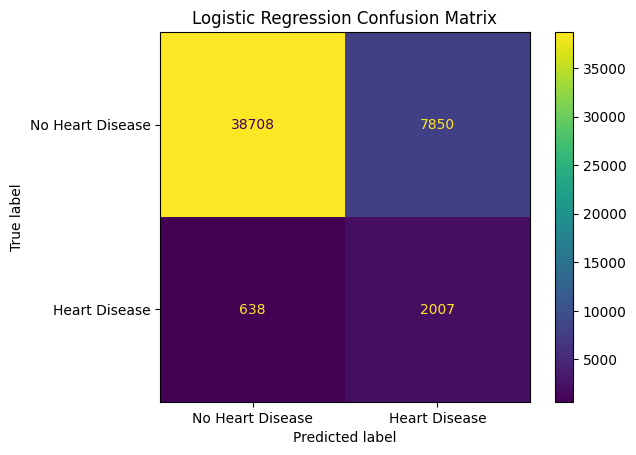

(0.8274901936873768, array([0.90119203, 0.32106863]))

In [99]:
lr_accuracy, lr_f1 = evaluate_model(lr, X_test, y_test, 'Logistic Regression')
lr_accuracy, lr_f1

### Random Forest

In [64]:
rf = RandomForestClassifier()
rf_start = timer()
rf.fit(X_train_resampled, y_train_resampled)
rf_end = timer()
rf_training_time = rf_end - rf_start
rf

RandomForestClassifier()

Random Forest Classifier Accuracy: 0.95
Random Forest Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     46558
           1       0.49      0.31      0.38      2645

    accuracy                           0.95     49203
   macro avg       0.72      0.64      0.67     49203
weighted avg       0.94      0.95      0.94     49203



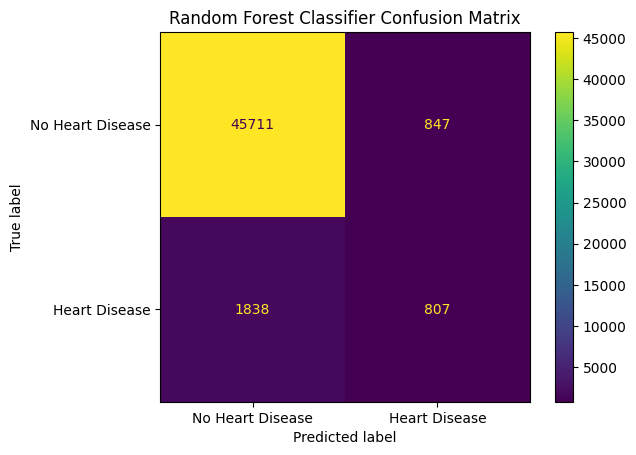

(0.9454301566977623, array([0.97146865, 0.37543615]))

In [100]:
rf_accuracy, rf_f1 = evaluate_model(rf, X_test, y_test, 'Random Forest Classifier')
rf_accuracy, rf_f1

### Naive Bayes

In [76]:
nb = GaussianNB()
nb_start = timer()
nb.fit(X_train_resampled, y_train_resampled)
nb_end = timer()
nb_training_time = nb_end - nb_start
nb

GaussianNB()

Naive Bayes Accuracy: 0.81
Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.81      0.89     46558
           1       0.18      0.75      0.30      2645

    accuracy                           0.81     49203
   macro avg       0.58      0.78      0.59     49203
weighted avg       0.94      0.81      0.86     49203



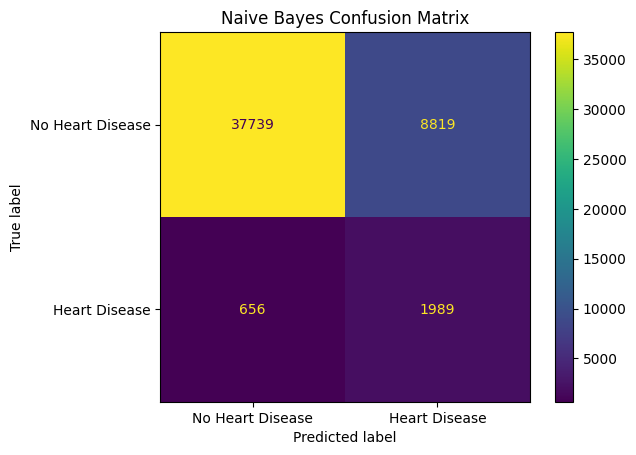

(0.8074304412332581, array([0.88846774, 0.29569613]))

In [101]:
nb_accuracy, nb_f1 = evaluate_model(nb, X_test, y_test, 'Naive Bayes')
nb_accuracy, nb_f1

## Comparar resultados

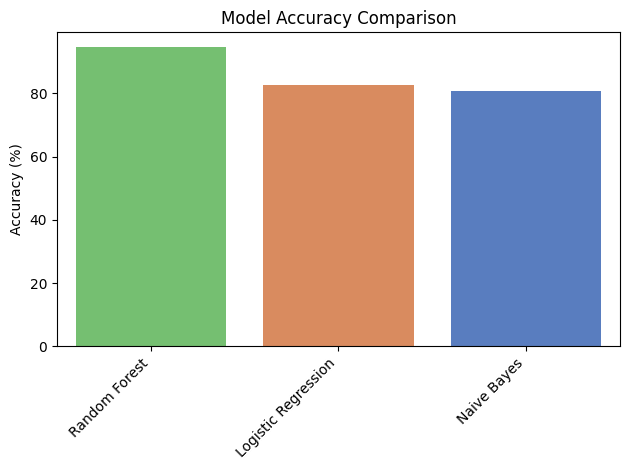

In [74]:
model_names = ['Logistic Regression', 'Naive Bayes', 'Random Forest']
accuracies = [lr_accuracy * 100, nb_accuracy * 100, rf_accuracy * 100]

df_results_acc = pd.DataFrame({
    "Model": model_names,
    "Accuracy": accuracies
})
df_results_acc = df_results_acc.sort_values(by=["Accuracy"], ascending=False)

plt.figure()
sns.barplot(df_results_acc, x="Model", y="Accuracy", hue="Accuracy", legend=False, palette="muted")
plt.ylabel("Accuracy (%)")
plt.xlabel(None)
plt.title("Model Accuracy Comparison")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

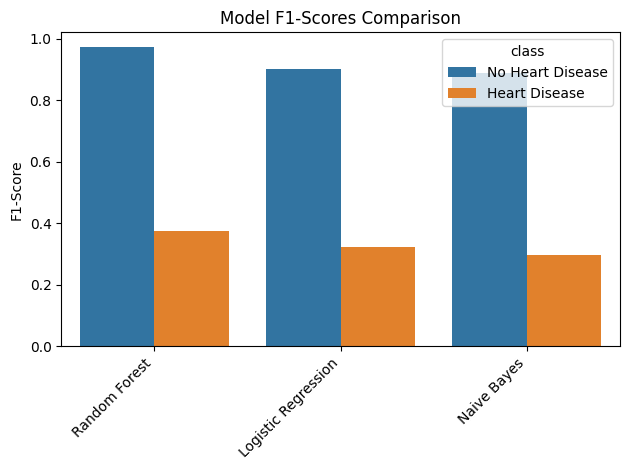

In [133]:
model_names = ['Logistic Regression', 'Naive Bayes', 'Random Forest']
combined_f1 = [lr_f1, nb_f1, rf_f1]

f1_scores = {
    "model": [],
    "f1-score": [],
    "class": []
}
for i in range(len(model_names)):
    f1_0, f1_1 = combined_f1[i]
    model = model_names[i]
    # Append f1 for first class
    f1_scores["model"].append(model)
    f1_scores["f1-score"].append(f1_0)
    f1_scores["class"].append("No Heart Disease")
    # Append f1 for second class
    f1_scores["model"].append(model)
    f1_scores["f1-score"].append(f1_1)
    f1_scores["class"].append("Heart Disease")

df_results_f1 = pd.DataFrame(f1_scores)
df_results_f1 = df_results_f1.sort_values(by=["f1-score"], ascending=False)

plt.figure()
sns.barplot(df_results_f1, x="model", y="f1-score", hue="class", errorbar=None)
plt.ylabel("F1-Score")
plt.xlabel(None)
plt.title("Model F1-Scores Comparison")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

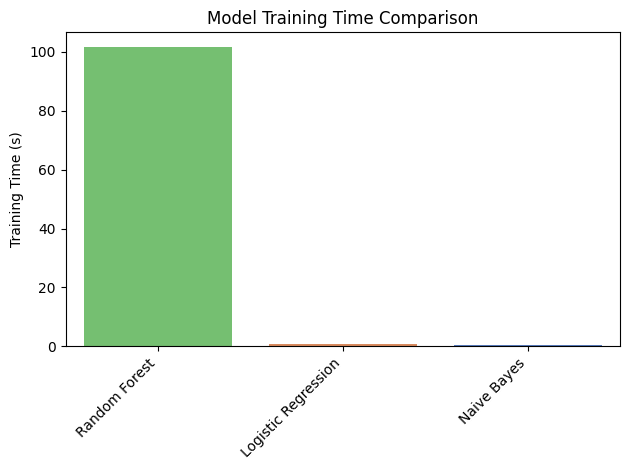

In [73]:
model_names = ['Logistic Regression', 'Naive Bayes', 'Random Forest']
training_times = [lr_training_time, nb_training_time, rf_training_time]

df_results_time = pd.DataFrame({
    "Model": model_names,
    "Training Time": training_times
})
df_results_time = df_results_time.sort_values(by=["Training Time"], ascending=False)

plt.figure()
sns.barplot(df_results_time, x="Model", y="Training Time", hue="Training Time", legend=False, palette="muted")
plt.ylabel("Training Time (s)")
plt.xlabel(None)
plt.title("Model Training Time Comparison")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

## Predicciones Individuales

In [136]:
# Seleccionar las primeras cinco muestras del conjunto de prueba
X_samples = X_test[:5]
y_samples = y_test[:5].values  # Extraer valores de y_test correspondientes

# Crear un DataFrame para almacenar resultados
predictions_df = pd.DataFrame({
    "Real Value": y_samples,
    "Logistic Regression": lr.predict(X_samples),
    "Naive Bayes": nb.predict(X_samples),
    "Random Forest": rf.predict(X_samples)
})

# Añadir información descriptiva a la tabla
class_map = {0: "No Heart Disease", 1: "Heart Disease"}
predictions_df['Real Value'] = predictions_df['Real Value'].map(class_map)
predictions_df['Logistic Regression'] = predictions_df['Logistic Regression'].map(class_map)
predictions_df['Naive Bayes'] = predictions_df['Naive Bayes'].map(class_map)
predictions_df['Random Forest'] = predictions_df['Random Forest'].map(class_map)

print("Predicciones de los primeros cinco ejemplos del conjunto de prueba:")
display(predictions_df)

Predicciones de los primeros cinco ejemplos del conjunto de prueba:


,Real Value,Logistic Regression,Naive Bayes,Random Forest
0,Heart Disease,Heart Disease,Heart Disease,Heart Disease
1,No Heart Disease,No Heart Disease,No Heart Disease,No Heart Disease
2,No Heart Disease,Heart Disease,Heart Disease,No Heart Disease
3,No Heart Disease,No Heart Disease,No Heart Disease,No Heart Disease
4,No Heart Disease,No Heart Disease,No Heart Disease,No Heart Disease
